In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [353]:
train_data = '/kaggle/input/playground-series-s4e10/train.csv'
test_data = '/kaggle/input/playground-series-s4e10/test.csv'
sample_submission = '/kaggle/input/playground-series-s4e10/sample_submission.csv'

In [354]:
df = pd.read_csv(train_data)

In [355]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Data Cleaning

In [378]:
df.drop(columns = 'id',axis = 1 , inplace = True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_category,age_category
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,Low,30-40
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,Medium,20-30
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,Low,20-30
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,Medium,20-30
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,Medium,20-30


In [379]:
df.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_status                    0
income_category                1
age_category                  12
dtype: int64

In [380]:
df.dropna(subset=['income_category', 'age_category'],inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
income_category               0
age_category                  0
dtype: int64

In [381]:
df.duplicated().sum()

0

## Outliers Handeling

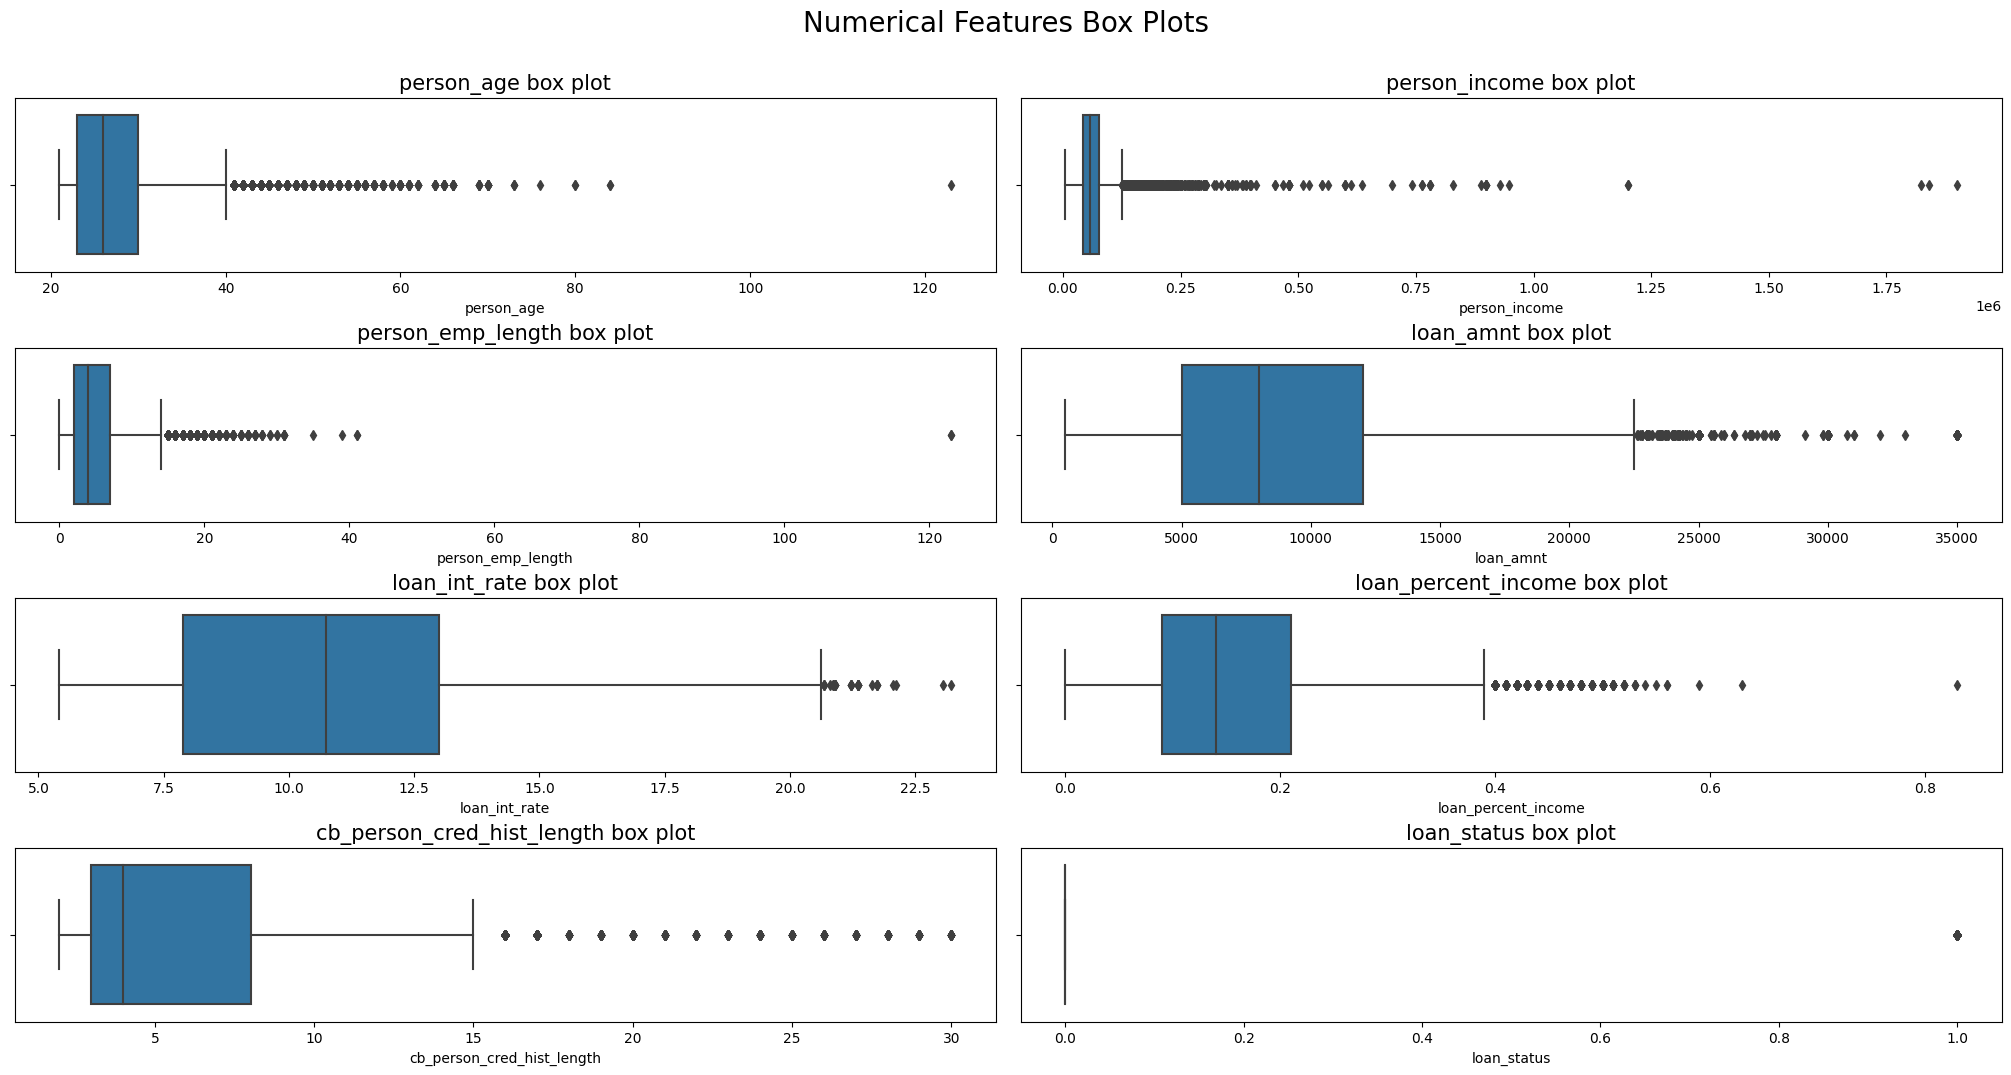

In [382]:
fig, axs = plt.subplots(4,2 , figsize=(20, 10), constrained_layout=True)
axs = axs.flatten()
for i, c in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(data=df.select_dtypes(include='number'), x=c, ax=axs[i])
    axs[i].set_title('{} box plot'.format(c), fontsize=15)
for j in range(len(df.select_dtypes(include='number').columns), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Numerical Features Box Plots', x=0.5, y=1.06, fontsize=20)
plt.show()

In [383]:
def outliers_handling(x, p1=0.25 , p2=0.75):
    ql = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - ql
    min_limit = ql - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

In [384]:
numerical_features = df[['person_age','person_income','person_emp_length','loan_amnt',
                         'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']]
for col in numerical_features:
    df[col] = outliers_handling(df[col])

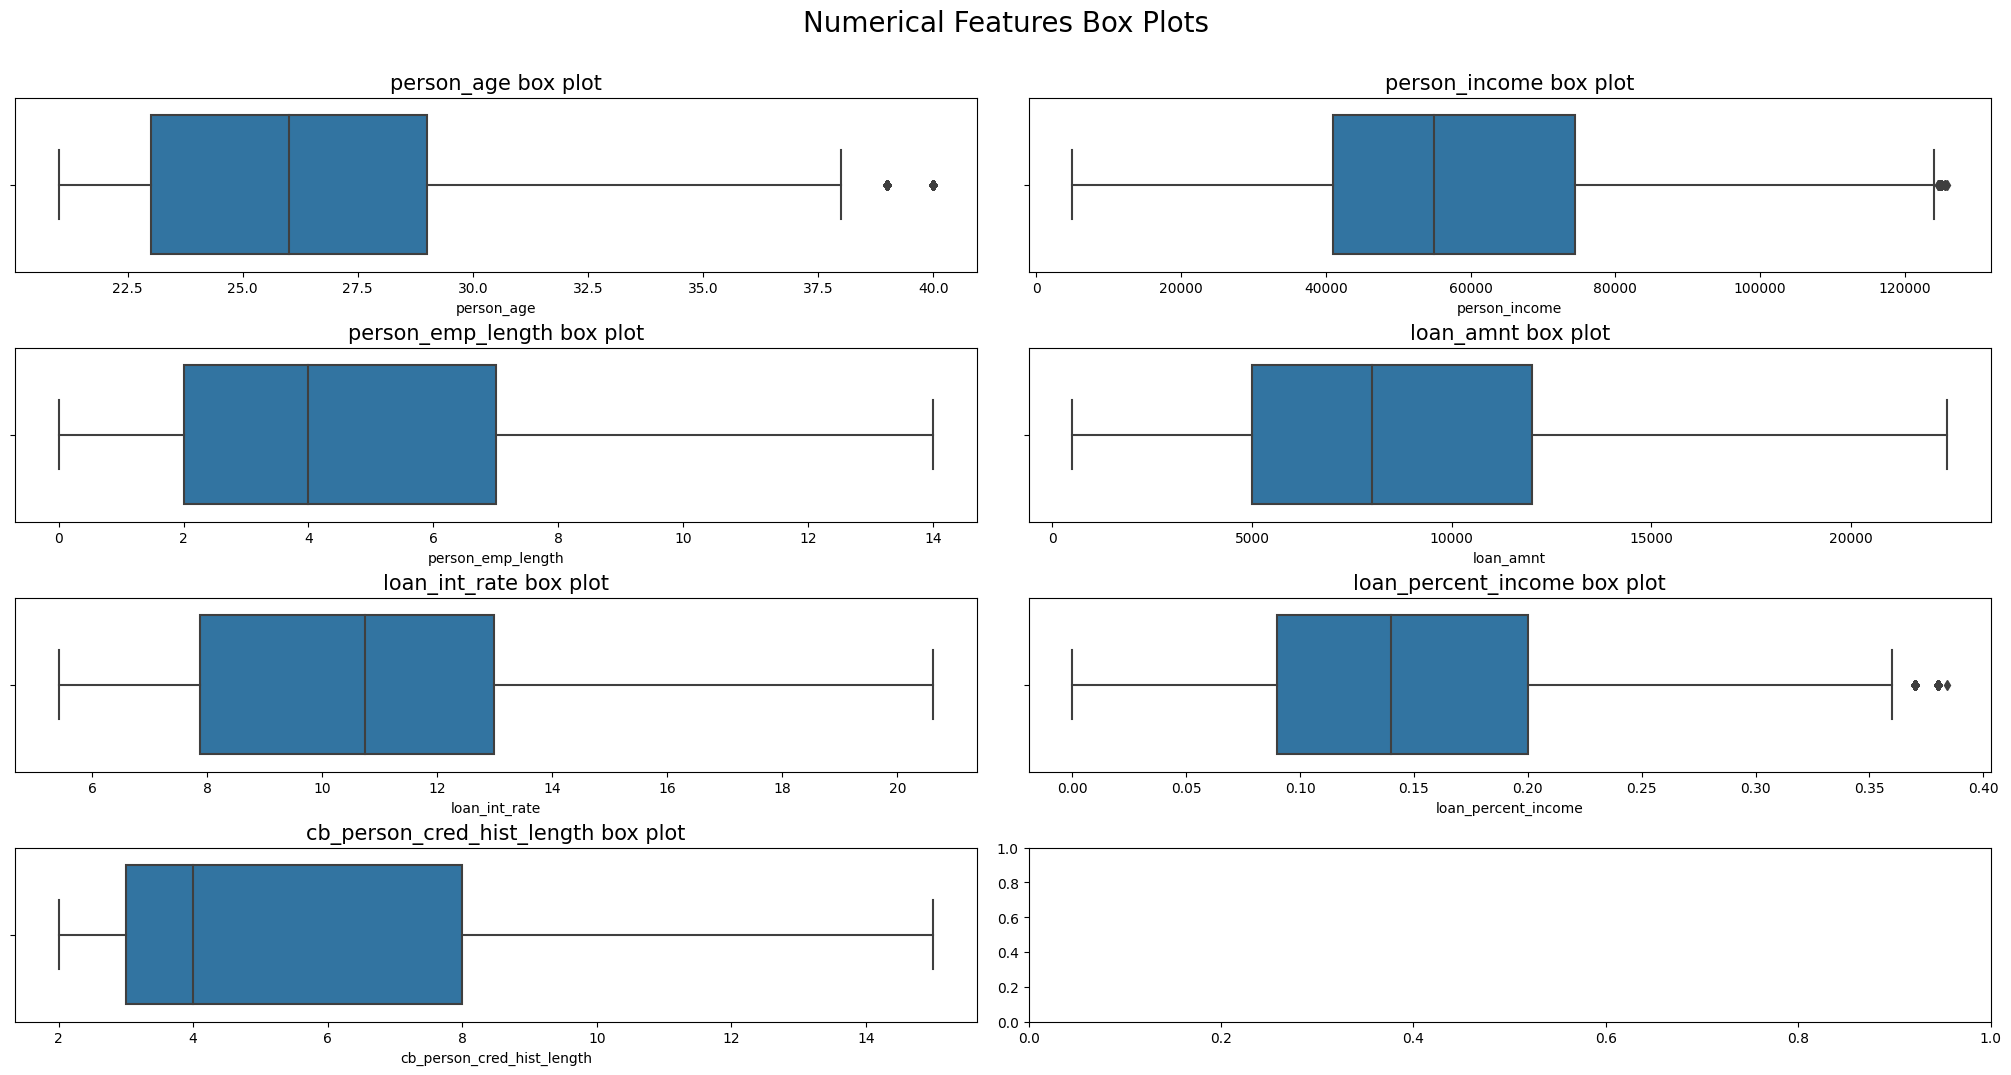

In [385]:
fig, axs = plt.subplots(4, 2, figsize=(20, 10), constrained_layout=True)
axs = axs.flatten()
for i, c in enumerate(numerical_features.columns):
    sns.boxplot(data=df, x=c, ax=axs[i])
    axs[i].set_title('{} box plot'.format(c), fontsize=15)

plt.suptitle('Numerical Features Box Plots', x=0.5, y=1.06, fontsize=20)
plt.show()

## Feature Engineering & Selection

In [386]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_category,age_category
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0,Low,30-40
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0,Medium,20-30
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0,Low,20-30
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0,Medium,20-30
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0,Medium,20-30


In [387]:
#Income to Loan Amount Ratio
df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_category,age_category,income_to_loan_ratio
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0,Low,30-40,5.833333
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0,Medium,20-30,14.000000
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0,Low,20-30,4.800000
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0,Medium,20-30,5.833333
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0,Medium,20-30,10.000000


In [388]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix["loan_status"].sort_values(ascending = False)

loan_status                   1.000000
loan_int_rate                 0.337545
loan_percent_income           0.307736
loan_amnt                     0.123090
cb_person_cred_hist_length   -0.011471
person_age                   -0.014269
person_emp_length            -0.113083
income_to_loan_ratio         -0.163678
person_income                -0.216112
Name: loan_status, dtype: float64

<Axes: >

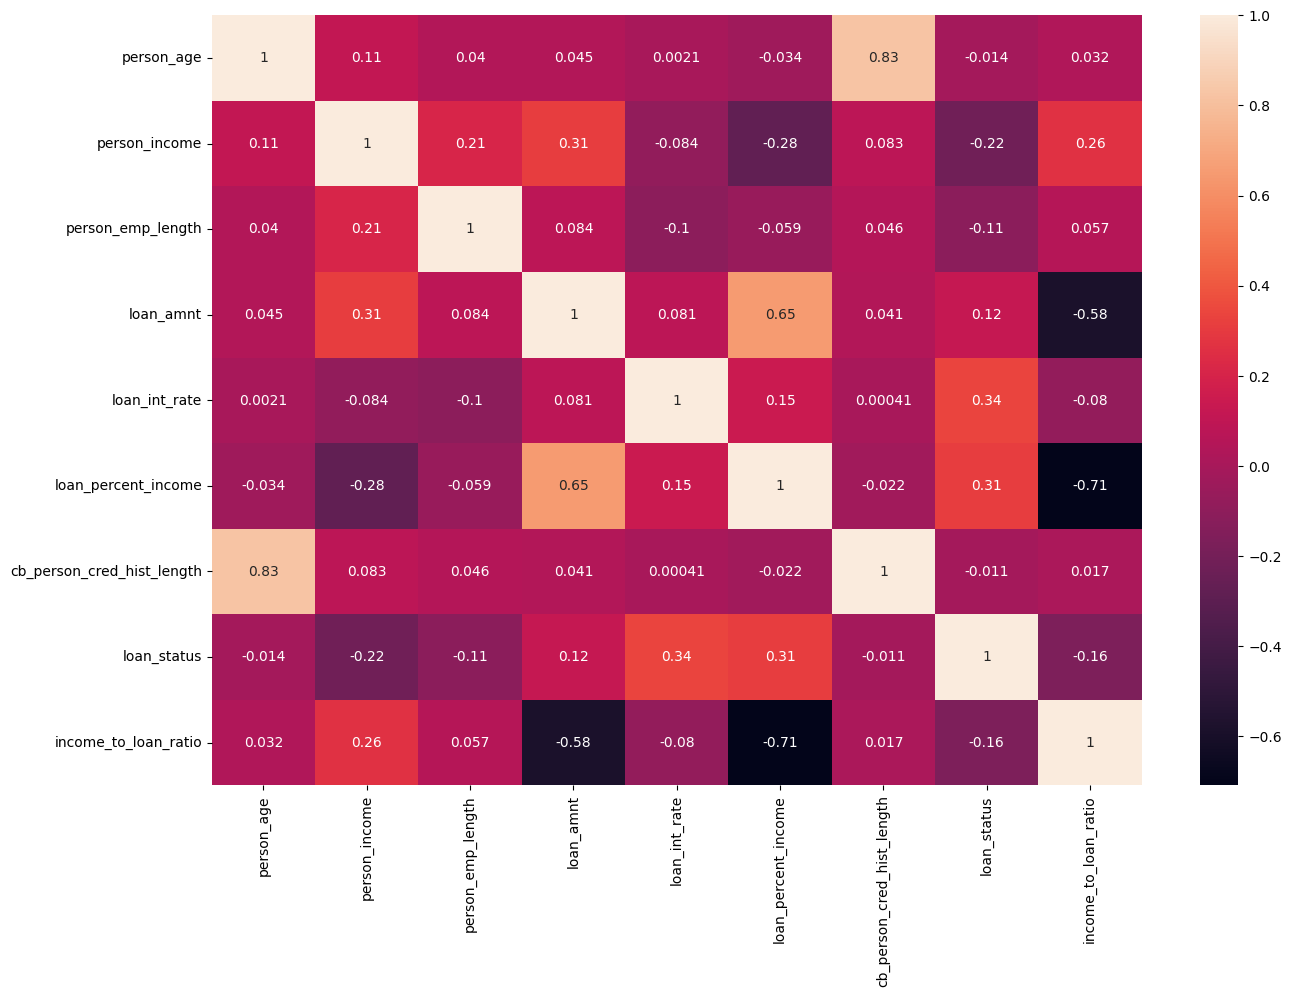

In [389]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [406]:
df.to_csv('df_cleaned.csv',index=False)